In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import h5py

In [ ]:
dirname = '/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad'
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/1 1
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/2 3228
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/3 1659
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/4 7784
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/5 4339
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/6 2100
/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/7 2211
Directorios leidos: 7
Imagenes en cada directorio [3229, 1659, 7784, 4339, 2100, 2211, 1172]
suma Total de imagenes en subdirs: 22494


In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
edades=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    edades.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  22494
0 1
1 2
2 3
3 4
4 5
5 6
6 7
Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [ ]:
print(X.shape)

(22494, 200, 200, 3)


In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (17995, 200, 200, 3) (17995,)
Testing data shape :  (4499, 200, 200, 3) (4499,)


In [ ]:
# Guardar en un formato h5 los datos
with h5py.File('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/train_dataset.h5','w') as h5data:
    h5data.create_dataset('train_set_x',data=train_X)
    h5data.create_dataset('train_set_y',data=train_Y)
with h5py.File('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/test_dataset.h5','w') as h5data:
    h5data.create_dataset('test_set_x',data=test_X)
    h5data.create_dataset('test_set_y',data=test_Y)

In [2]:
# Cargar datos guardados
hf = h5py.File('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/train_dataset.h5', 'r')
hfy = h5py.File('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/test_dataset.h5', 'r')
train_X = hf.get('train_set_x')
train_Y = hf.get('train_set_y')
test_X = hfy.get('test_set_x')
test_Y = hfy.get('test_set_y')
train_X = np.array(train_X)
train_Y = np.array(train_Y)
test_X = np.array(test_X)
test_Y = np.array(test_Y)

In [3]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (17995, 200, 200, 3) (17995,)
Testing data shape :  (4499, 200, 200, 3) (4499,)


In [4]:
import cv2
def resize_data(data):  
    data_upscaled = np.zeros((data.shape[0], 100 , 100, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

train_X = resize_data(train_X)  
test_X = resize_data(test_X) 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32') 
train_X = train_X / 255  
test_X = test_X / 255 

In [5]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0.]
(14396, 100, 100, 3) (3599, 100, 100, 3) (14396, 7) (3599, 7)


In [ ]:
# Modelo 1
from keras.applications import vgg16

def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=(48,48,3), pooling=None, classes=7)

  return model

vgg16_model = create_vgg16()  

model=Sequential()
for capa in vgg16_model.layers:
  model.add(capa)

model.pop()
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       2

In [ ]:
history = model.fit(x=train_X, y=train_label, batch_size=32, epochs=10, verbose=1, validation_data=(valid_X, valid_label), shuffle=True)  

#Con esto se guarda el modelo actual con  el accuracy actual 
from keras.models import load_model
model.save('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/my_model1.h5')


Epoch 1/10
450/450 [==============================] - 1734s 4s/step - loss: 1.8079 - acc: 0.3449 - mse: 0.1160 - val_loss: 1.7621 - val_acc: 0.3495 - val_mse: 0.1137
Epoch 2/10
450/450 [==============================] - 1736s 4s/step - loss: 1.7593 - acc: 0.3458 - mse: 0.1137 - val_loss: 1.7601 - val_acc: 0.3495 - val_mse: 0.1137
Epoch 3/10
450/450 [==============================] - 1741s 4s/step - loss: 1.7582 - acc: 0.3458 - mse: 0.1137 - val_loss: 1.7593 - val_acc: 0.3495 - val_mse: 0.1136
Epoch 4/10
450/450 [==============================] - 1710s 4s/step - loss: 1.7573 - acc: 0.3458 - mse: 0.1136 - val_loss: 1.7581 - val_acc: 0.3495 - val_mse: 0.1136
Epoch 5/10
450/450 [==============================] - 1729s 4s/step - loss: 1.7555 - acc: 0.3458 - mse: 0.1136 - val_loss: 1.7555 - val_acc: 0.3495 - val_mse: 0.1134
Epoch 6/10
450/450 [==============================] - 1740s 4s/step - loss: 1.7503 - acc: 0.3458 - mse: 0.1133 - val_loss: 1.7483 - val_acc: 0.3495 - val_mse: 0.1131
Epoc

KeyError: ignored

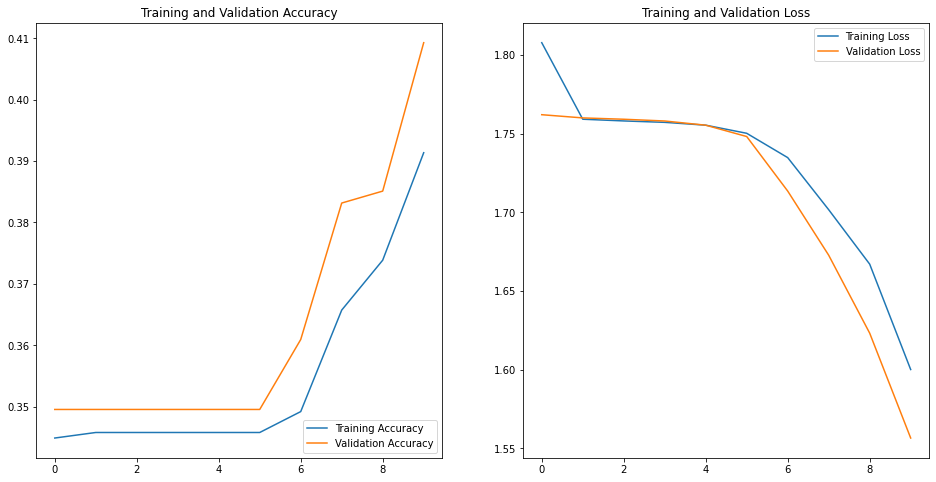

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Evaluacion del modelo
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

141/141 [==============================] - 108s 768ms/step - loss: 1.5544 - acc: 0.4083 - mse: 0.1034
Test loss: 1.5544259548187256
Test accuracy: 0.40831294655799866


0
0


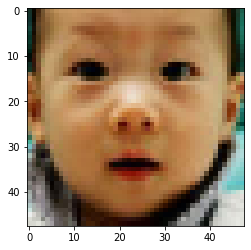

2
6


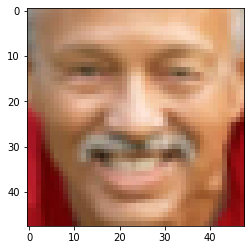

2
2


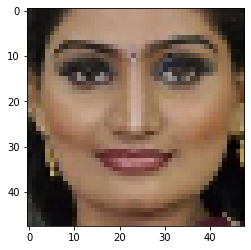

2
0


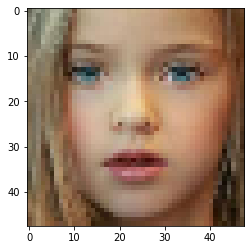

2
5


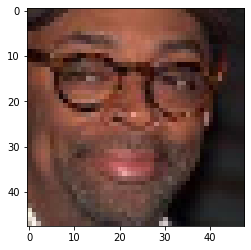

2
3


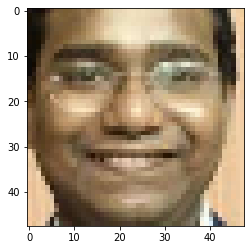

2
2


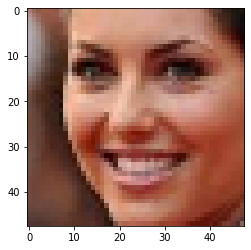

5
2


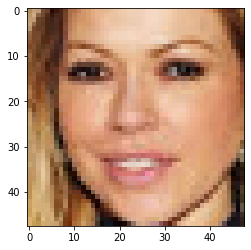

2
2


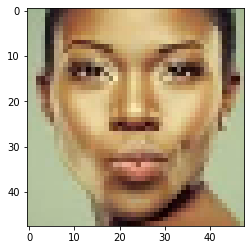

0
2


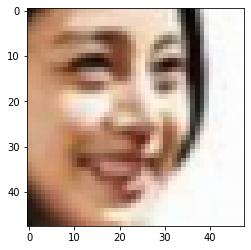

In [ ]:
# Predecir ejemplos sin entrenar
import tensorflow as tf
test_rostro_Ds = tf.data.Dataset.from_tensor_slices((valid_X, valid_label))
for image,label in test_rostro_Ds.take(10):  
  print(np.argmax(model(np.expand_dims(image,0)).numpy())) # Procesing one example  
  print(np.argmax(label.numpy())) # Procesing one example  
  plt.imshow(tf.squeeze(image.numpy()))
  plt.show()

In [11]:
# Modelo 2
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv2D(32, 3, padding = "same", activation = "relu", input_shape = (100,100,3), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Conv2D(32, 3, padding = "same", activation = "relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, 3, padding = "same", activation = "relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Conv2D(64, 3, padding = "same", activation = "relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, 3, padding = "same", activation = "relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Conv2D(128, 3, padding = "same", activation = "relu", kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(7, activation = "softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50, 50, 64)       

In [12]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X,  train_label, validation_data=(valid_X, valid_label), epochs=15)
#Con esto se guarda el modelo actual con  el accuracy actual 
from keras.models import load_model
model.save('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/my_model2.h5')

Epoch 1/15
450/450 [==============================] - 1085s 2s/step - loss: 1.8399 - accuracy: 0.3818 - val_loss: 1.8153 - val_accuracy: 0.3626
Epoch 2/15
450/450 [==============================] - 1071s 2s/step - loss: 1.4383 - accuracy: 0.4794 - val_loss: 1.6953 - val_accuracy: 0.4212
Epoch 3/15
450/450 [==============================] - 1069s 2s/step - loss: 1.3393 - accuracy: 0.5003 - val_loss: 1.5071 - val_accuracy: 0.5057
Epoch 4/15
450/450 [==============================] - 1072s 2s/step - loss: 1.2756 - accuracy: 0.5151 - val_loss: 1.5292 - val_accuracy: 0.5029
Epoch 5/15
450/450 [==============================] - 1069s 2s/step - loss: 1.2376 - accuracy: 0.5292 - val_loss: 1.4697 - val_accuracy: 0.5271
Epoch 6/15
450/450 [==============================] - 1068s 2s/step - loss: 1.1980 - accuracy: 0.5402 - val_loss: 1.4912 - val_accuracy: 0.5074
Epoch 7/15
450/450 [==============================] - 1068s 2s/step - loss: 1.1821 - accuracy: 0.5533 - val_loss: 1.3650 - val_accuracy:

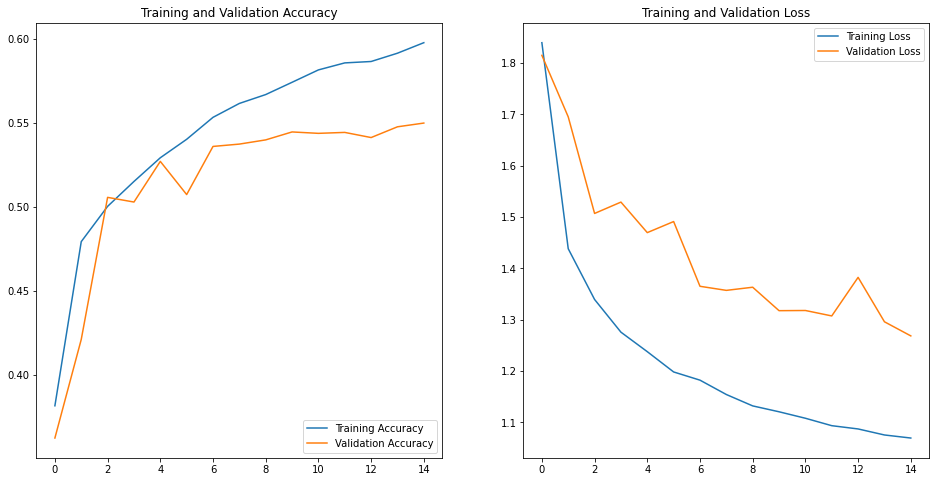

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Con esto se carga el modelo guardado
from keras.models import load_model
model = load_model('/content/drive/My Drive/Diplomado DeepLearning/proyect/rostro/edad/my_model2.h5')

In [15]:
#Evaluacion del modelo
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

141/141 [==============================] - 69s 492ms/step - loss: 1.2700 - accuracy: 0.5483
Test loss: 1.2700082063674927
Test accuracy: 0.548344075679779


0
0


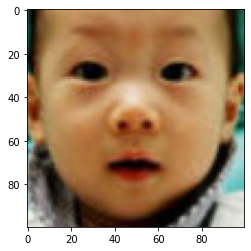

4
6


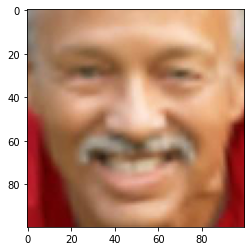

2
2


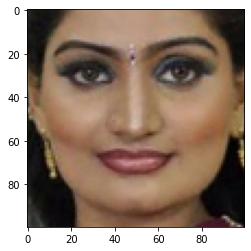

0
0


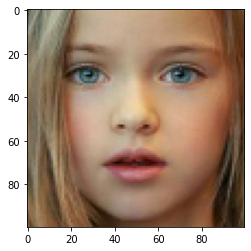

4
5


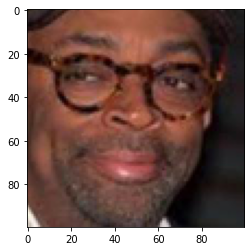

3
3


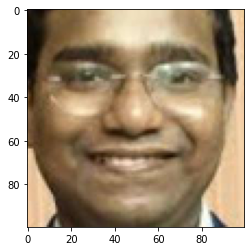

2
2


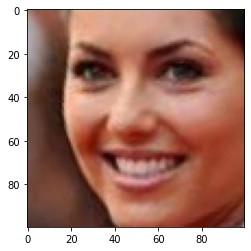

2
2


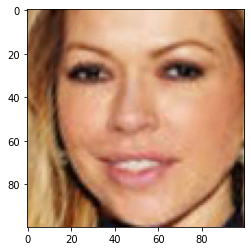

2
2


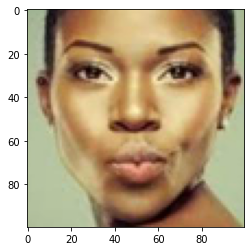

2
2


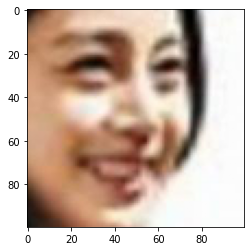

In [16]:
# Predecir ejemplos sin entrenar
import tensorflow as tf
test_rostro_Ds = tf.data.Dataset.from_tensor_slices((valid_X, valid_label))
for image,label in test_rostro_Ds.take(10):  
  print(np.argmax(model(np.expand_dims(image,0)).numpy())) # Procesing one example  
  print(np.argmax(label.numpy())) # Procesing one example  
  plt.imshow(tf.squeeze(image.numpy()))
  plt.show()